In [22]:
%run import.py
%run binary_metrics_plots.py


# Metrics For Binary Classification #

Binary classification is one of the largest used algorithms in machine learning. Before looking at other ways to evaluate binary classification algorithms lets look at how accuracy alone could be misleading. Usually we refrence one class as positive and the other as negative, where positive is the class we wnat to know.

### Kinds of Error ###

Accuracy maynot be the best measur of predictive preformance as it groups all errors togehter. Instead we may be interested in how many time it predicts a negative class when it was truly a positive. Imagine detecting for cancer using an automted test. A negative would mean that the patient is healthy and a positive would meanthey need aditional screening. In this screening there are two mistakes that can be made. One is that the patient could be lableled as positive and do additional screeniong to find out they were truly negative. This would casue an incovinence and some extra cost for the patient. And incorrect positive prediction is called a *false positive*. The other mistake is that a sick patient is labeled negative and will not recieve futher testing. This undiagnosed ancer may lead to further health issues and could even be fatal. A mistake of this kind-an incorrect negative prediction is called a *fasle negative*. In statistics a false positive is known as a type I error and a false negative is  a type II error. In this scenario we want to avoid false negatives , while false positives can be viewed as more of a minor nuisance.

### Imbalanced Datasets ###

Types of error play an important role in datasets where one of the two classes is more frequent than the other. These types of datasets are often called *imbalalced datasets* in reality inbalanced datasets are pretty common. Lets say you develop a classifaction model for a click prediction task, where the frequency of click is much much maller than the frequency on no-click. Lets say the accuracy of your classifier is 99%. This sounds like a really good model, but it does not take the inbalance into account. Since the no-click is so so frequent you could obtain the same accuracy by just predicting everything as no-click. Therfore we need a better way of distinguishing a good model from just pridicting no-click.

To illustrate this we will create a 9:1 imbalanced set using the digits dataset. We will calssify a 9 as positive and everything else as negative:

In [2]:
from sklearn.datasets import load_digits 
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

We can create a dummy classifier that always predicts the majority to show how uninfromative accuracy can be:

In [3]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) 
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))


Unique predicted labels: [False]
Test score: 0.90


Her we obtained 90% accuracy without actually learning anything. Therfore if someone just says that they have a model that is 90% accurate they may just be predicting one class and not have a very good model at all. Lets compare this to using an actual classifier:

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train) 
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


Here we only got slightly better accuracy. Therfore we either have a problem with our decision tree or accuracy is not a good way to seperate the models. Lets evaluate 2 othe models logisitc regression and the default DummyClassifier which makes random predictions but produces calsses with the same proportions as the training set.

In [5]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1, max_iter=1000000).fit(X_train, y_train) 
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.80
logreg score: 0.98


Here the dummy is not as good as our most frequent approach and logistic regressions is very accurate. THis makes it hard to judge which of these results is actually helpful. We would like to have metrics that tell us how much better is our model than just picking the most frequent prediction or random predictions.

### Confusion Matricies ###

One of the ways to list the reuslts of a binary clssifier is through using confusion matrices. Lets inspect the confusion matrix of LogistocRegression using the confusion_matrix function:

In [6]:
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


The output is a 2x2 array were rows correspond to true classes and colums correspond to predicted classes. Each entry represeents how many times a sample belongs to the class corresponding to the row was classified as the class corresponding to the column. We can see this in the following illustration:

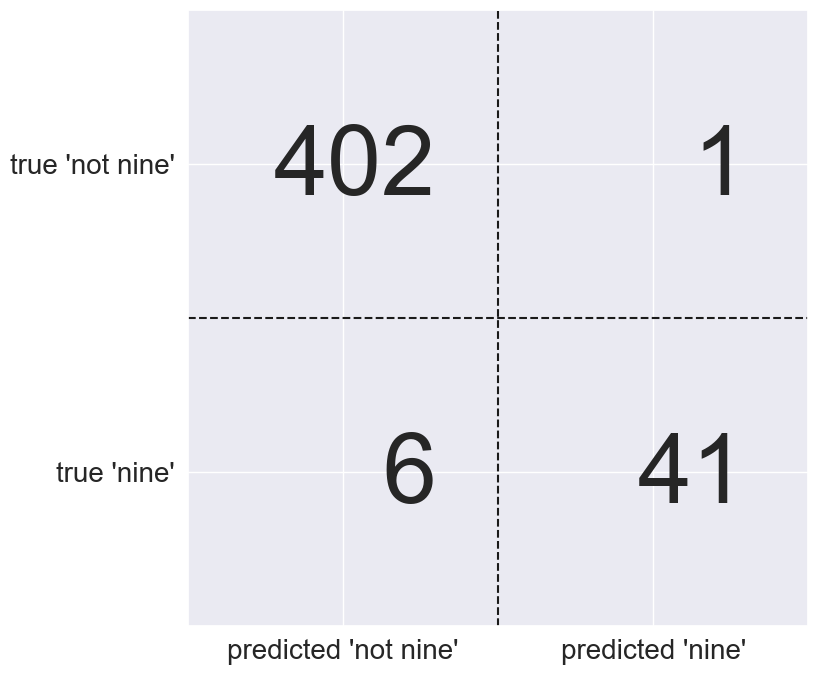

In [17]:
plot_confusion_matrix_illustration(confusion)

The entries on the diagonal are the correct classifications. THe other entries tell us how many samples got mistakenly classified. the upper left box are tru positive results. The bottom right are true negative results. THe bottom left are false negative results, and the top right are false positive results:

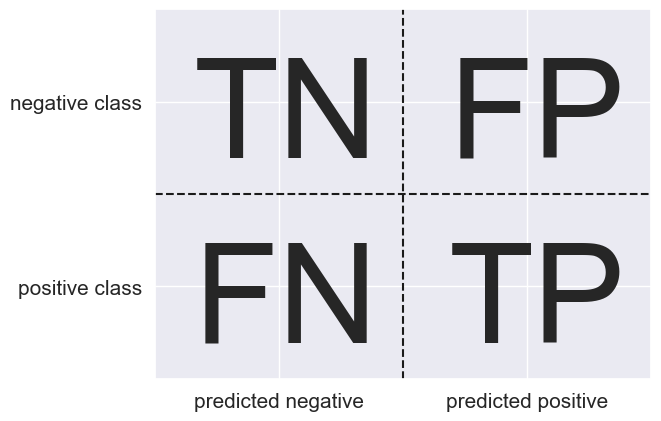

In [18]:
plot_binary_confusion_matrix()

NOw we can use confusion matricies to compare the four modles we discussed earlier:

In [11]:
print("Most frequent class:") 
print(confusion_matrix(y_test, pred_most_frequent)) 
print("\nDummy model:") 
print(confusion_matrix(y_test, pred_dummy)) 
print("\nDecision tree:") 
print(confusion_matrix(y_test, pred_tree)) 
print("\nLogistic Regression") 
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[362  41]
 [ 42   5]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


We can interpret alot from these confusion maticies and see that the most frequent has 0 true positives. Also the Dummy model has very few true postives and even more true negatives. Overall the only two that make sense are the decision tree and the logistic regression. Here logistic regression definately out-preforms the decision tree. nspecting these matricies can be quite manual an cumbersom so there are several ways to summerize the information

## Accuracy ##

$ Accuracy= \frac{TP+TN}{TP+TN+FP+FN}$

### Precision Recall and f-score ###

PRecision measures how many samples predicted positive are actually poitive:

$Precision=\frac{TP}{TP+FP}$


PRecision is used a s apreformance metric when the goal is to limit the number of false positives. an example would be predicting the effectivness of a drug. Running trials is expensive so the company would wnat to know that the drug will actually work. THerfore they would want a low amount of false positives and high precision. Precision is also known as *positive PRedictive Power* (PPV).

Recall measures how many of the positive samples are captures by the positive predictions:

$Recall=\frac{TP}{TP+FN}$

Recall is used when trying to avoid false negatives. Our cancer problem form earlier is a good example of when to use this metric. There is a tradeoff between precision and recall. If you were to have perfect recall it can lead to low precision. On the other hand if you have perfect precison it can lead to low recall. While both of these are very important looking at one of them alone will not provide the full picture. On way to summerize them is the f-measure, which is the harmonic mean of precision and recall:

$F=2*\frac{precision*recall}{precision+recall}$

Lets run these differnt metrics on our 9 vs rest dataset:

In [12]:
from sklearn.metrics import f1_score 
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy))) 
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree))) 
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.11
f1 score tree: 0.55
f1 score logistic regression: 0.92


From this we can easilt see that most frequent is not good at all. Also we can now see there is a big difference between the dummy classifier and the decision tree. Overall though logistic regression does the best. We can get a more comprehensive summary from the classification_report function to compute all the metrics:

In [14]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred_most_frequent,target_names=["not nine", "nine"]))
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))


              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

              precision    recall  f1-score   support

    not nine       0.90      0.90      0.90       403
        nine       0.11      0.11      0.11        47

    accuracy                           0.82       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.82      0.81       450

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



/Users/kgteller/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kgteller/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kgteller/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


When looking at hese tables it depends on what class we look at and are considering the imporatnat class. THe dummy classifier has an f1-score of .1 for the nine class vs .92 for logisitc regresssion. comparinf that to the not nine class the dummy model has an f-score of .91 vs .99 when compared to logistic regression. Both of these seem reasonable. Putting all the number together is what paints an accurate picture and shows the supperiority of logistic regression on this dataset

### Taking Uncertainty into Account ###

As we have talked about mos classifiers have a decision_function or a predict-proba method to access the degrees of certainty about predictions. Using confusion matriciesand the clssification report has set these values to 0 for the decision function or .5 for the predict_proba. Below we can see a plot of a inbalanced binary classification task with 400 points in the negative calss and 50 in th positive class. THe model is trained using a kernel SVM model on the graphics on the right illustrate the decision function as a plot on the data and as a heat map. The circle in the top represents the decision boundary. Any points within the boundary are considered the positive class and anythiing outside are the negative calss.

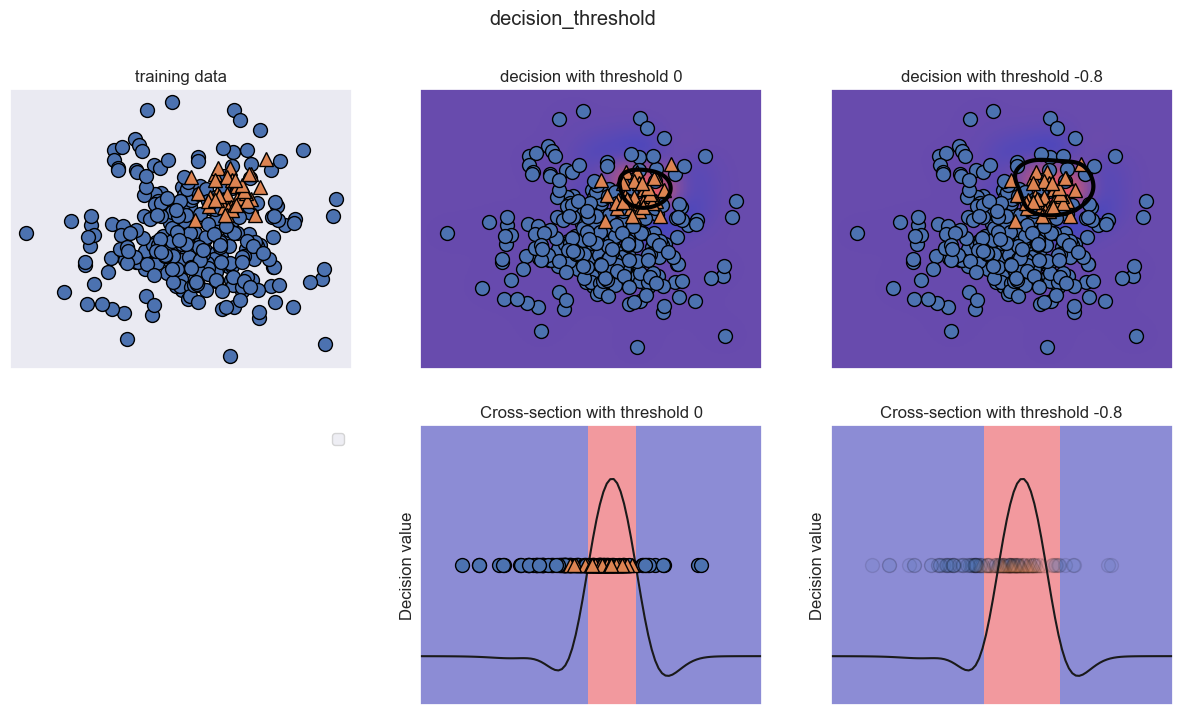

In [23]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
plot_decision_threshold()

We can use the classification report to evealuate the precision and recall when the treshold is 0:

In [24]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



For class 1 we can see the precision is not great and the recall is mixed. Overall the clssifier focuses on getting class 0 right becasue there are more of e those values. Maybe we need to have a higher recall for class 1. THis means we are will to risk more false positives in exchange for more true positives. The predictions generated from svc.predict do not fulfill this requirement but we can adjust the predicitons to do this. By default points with a decision_function greater than 0 will be calssified as class 1. We want more points classified as class one so we need to lower the threshold:

In [25]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

NOw lets look at the classification report for this prediction:

In [26]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



As expected the recall of class 1 went up and the precision went down. We are now classifying a larger region of space as class 1. If yoo vlaue precision over recall or vice-versa and you data is imbalanced, changing the decision threshold is the easiest way to obtain better results. Since the decision function can have an arbitrary range  there is no rule of thumb when picking a threshold. If you are choosing to set a threshold, you need to do so on a validation or cross-validation set and not on your test set.




### PRecision Recall curves ###

We can compare the precision and recall for a set of threshold by looking at what is called a precision recall curve. scikit-learn implements these under its metrics module. The function needs the fround truth lables and the uncertainties produces by the decision_function or predict_proba: 

In [27]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

The function report the precision and recall for all possible trhesholds in sorted order. Therfore we can plot the results as seeh in the following figure:

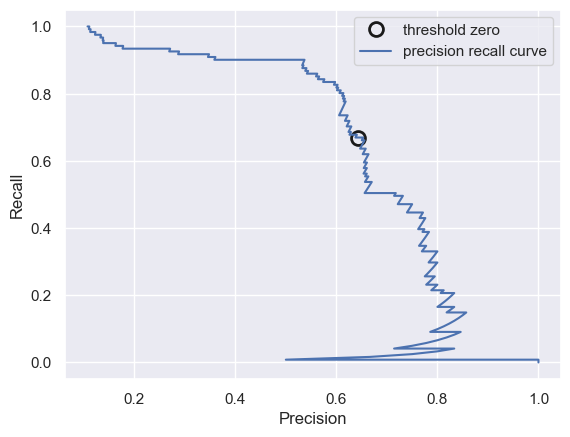

In [28]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds)) 
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

Each point Corresponds to a possible threshold of the decision_function. A recall of .4 can be obtained at a oprecision of .75. Overall a curve that is closer to the upper right corner would be a better classiier. Looking at thsi curve we can see that at a precision of .5 we can still get a pretty high recall. After this point if er try to increase the precision we drastically dedcrease the recall. 

Different classifiers may work well in different areas aof the precision-recall space. lets compare this SVM to a random forest model. Remeber the random forest does no have a decision_function but a predict_proba function. So to use it for an ROC curve we pass rf.PRedict_proba(x_test)\[:,1\], The default threshold is .5 so we mark that on the curve:

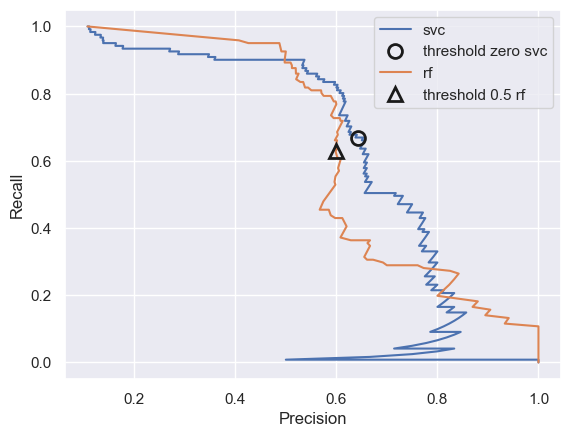

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


From this we can see that the random forest preforms better at the extremes for very high recall or very high precison. around the middle SVM preforms better. The differences in the two models  would be missed if ewe just looked at the defaul f1-scores:

In [30]:
print("f1_score of random forest: {:.3f}".format( f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


Nalyzing the differences between the two curves can be a manula process. One way we can summerize the curve is by taking the area under the curve and finding its average. this is known as average precision. YOu can use the average_precision_score function to compute this. We need to pass the results of pour precision or predict function not the results:

In [31]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1]) 
ap_svc = average_precision_score(y_test, svc.decision_function(X_test)) 
print("Average precision of random forest: {:.3f}".format(ap_rf)) 
print("Average precision of svc: {:.3f}".format(ap_svc))


Average precision of random forest: 0.660
Average precision of svc: 0.666


Now we see that the average precision of the two models is quite similar. If we were compre this to a descision fuction that assigns values at random the average precidion would be the fraction of positive samples in the dataset.

### ROC curves and AUC ###

Anothe method for looking over different thresholds is called the reciever operating charachteristics curve. THis curve the false positive rate to the recall. Here thr FPR is defined as:

$FPR=\frac{FP}{FP+TN}$

THe ROC curve can be computed using the roc_curve function:

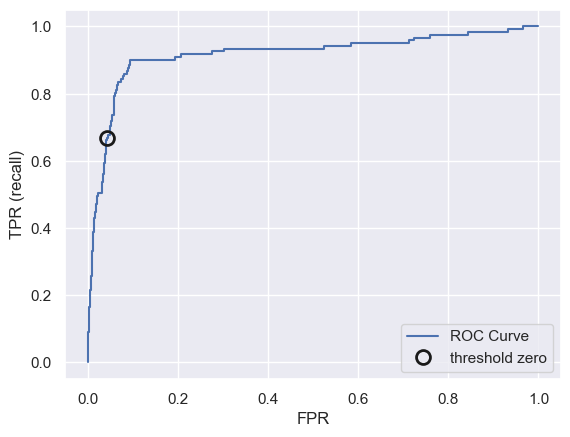

In [32]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds)) 
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


For the ROC curve the the ideal curve is near the top left. We want high recall and a low false positive rate. We can compare two ROC curves as follows:

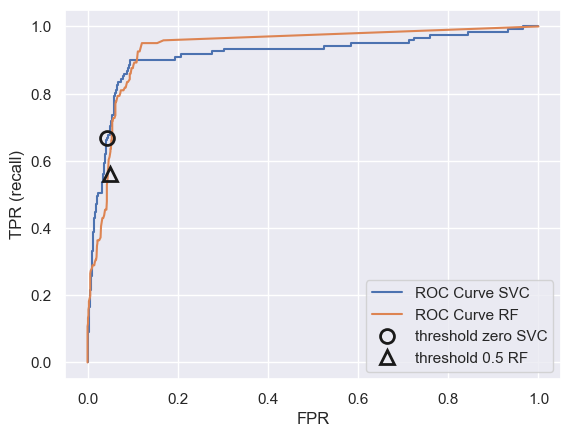

In [33]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In order to compre these curves we can also calculate the area under the curve known as the AUC score:

In [34]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]) 
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test)) 
print("AUC for Random Forest: {:.3f}".format(rf_auc)) 
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


Here the Random Forest produces a bit better than the SVM. AUC always produces a vlue between 0 and 1 . An AUC score of .5 would be the same as a model that randonly guesses.

Lets finally go back to the digits dataset and comprae SVC with three different gamma values

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.15 accuracy = 0.90 AUC = 0.79
gamma = 0.01 accuracy = 0.90 AUC = 1.00


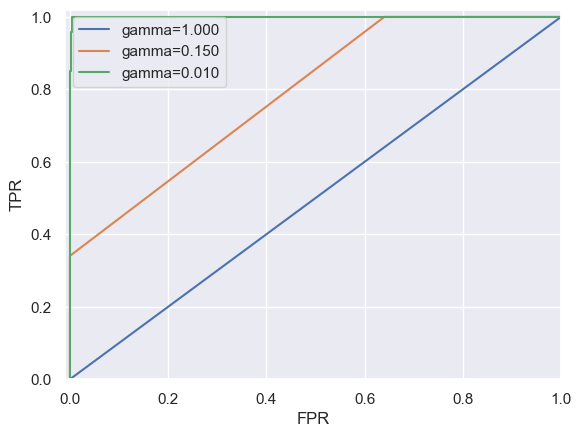

In [35]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.15, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test)) 
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test)) 
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")